# Data Cleaning 

In the following notebook I'll work on the Azrieli Trucks dataset.  
The goal of this project is to create a summary dataframe consist all driving data on each driver per month

## 0. Imports

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

sns.set(style='darkgrid')
%matplotlib inline

## 1. Drivers data 

### 1.0 Read the data 

In [172]:
drivers = {'drivers_with_kviut': pd.read_csv('data/Drivers_with_kviut.csv'),
           'new_drivers': pd.read_csv('data/new_drivers.csv')}

In [173]:
drivers['drivers_with_kviut'].head()

,Unnamed: 0,birthdate,gender,id,vetek
0,100,27/05/1964,m,502,7.9
1,101,10/07/1983,M,81,14.4
2,102,15/10/1992,M,814,18.7
3,103,18/07/1990,M,666,8.7
4,104,10/04/1969,M,205,9.9


In [174]:
drivers['new_drivers'].head()

,Unnamed: 0,birthdate,gender,id,vetek
0,0,19.06.1967,F,943,232.0
1,1,"february 13, 1979",M,966,28.0
2,2,19/11/1993,M,250,48.0
3,3,02/02/1961,NaN,156,272.0
4,4,07/03/1965,M,67,130.0


In [142]:
drivers['drivers']

,gender,id,vetek_years,birthdatetime,driver_avg_speed
0,F,943,0.635616,1967-06-19,00:00:48.764316
1,M,966,0.076712,1979-02-13,00:00:49.240081
2,M,250,0.131507,1993-11-19,00:00:48.850687
3,NaN,156,0.745205,1961-02-02,00:00:49.321937
4,M,67,0.356164,1965-07-03,00:00:49.197046
5,M,684,0.463014,1900-01-01,00:00:48.831456
6,M,527,0.386301,1900-01-01,00:00:49.111170
7,M,556,0.783562,1975-03-19,00:00:48.683364
8,M,446,0.123288,1976-09-05,00:00:49.098648
9,M,841,0.690411,1977-09-05,00:00:49.033609


### 1.1 Handle Vetek 

According to the customer, senior drivers' vetek counted by years, and juniors' vetek counted by days.  
Since the summary dataframe should contains a 'vetek' column by years, I'll convert all the 'vetek' data to years.  
In addition, the 'Unnamed: 0' column is useless, so we can get rid of it.

In [175]:
drivers['drivers_with_kviut'].rename(columns={'vetek':'vetek_years'}, inplace=True)
drivers['drivers_with_kviut'].drop('Unnamed: 0', axis=1, inplace=True)

In [176]:
drivers['new_drivers'].rename(columns={'vetek':'vetek_days'}, inplace=True)
drivers['new_drivers']['vetek_years'] = drivers['new_drivers']['vetek_days'].div(365)
drivers['new_drivers'].drop('Unnamed: 0', axis=1, inplace=True)

### 1.2 Handle Birthdates 

Now, let's handle with the birthdates format:

In [177]:
for df in drivers.values():
    df['birthdatetime'] = pd.to_datetime(df['birthdate'], dayfirst=True)

Let's verify that all the birthdates converted properly:

In [178]:
drivers['drivers_with_kviut']['birthdate'].isnull().sum() == drivers['drivers_with_kviut']['birthdatetime'].isnull().sum()

True

In [179]:
drivers['new_drivers']['birthdate'].isnull().sum() == drivers['new_drivers']['birthdatetime'].isnull().sum()

True

Let's calc the ages:

In [180]:
drivers['drivers_with_kviut']['birthdatetime'].describe()

count                     890
unique                    806
top       1900-01-01 00:00:00
freq                       53
first     1900-01-01 00:00:00
last      1993-11-19 00:00:00
Name: birthdatetime, dtype: object

We don't know the age of all the drivers which born on 01/01/1900:

In [181]:
drivers['drivers_with_kviut'].loc[drivers['drivers_with_kviut']['birthdatetime'] == \
                                  pd.to_datetime('1900'), 'birthdatetime'] = np.nan

In [182]:
drivers['new_drivers'].loc[drivers['new_drivers']['birthdatetime'] == \
                                  pd.to_datetime('1900'), 'birthdatetime'] = np.nan

For this cases which lack of both start and end time, I'll set the start time to be the first sunday of the month at 6am (to avoid bonuses), and then handle them like the only end_time is missing 

In [183]:
for df in drivers.values()drivers['drivers_with_kviut']:
    df['age'] = ((pd.Timestamp('now') - df['birthdatetime']) / pd.Timedelta(days=365))

In [191]:
drivers['drivers_with_kviut'].describe()

,id,vetek_years,age
count,900.000000,900.000000,837.000000
mean,497.104444,9.942111,42.935484
std,289.801390,5.154083,9.725695
min,1.000000,1.000000,27.000000
25%,245.750000,5.500000,34.000000
50%,497.500000,9.900000,42.000000
75%,745.250000,14.425000,51.000000
max,1000.000000,18.900000,61.000000


### 1.3 Handle Genders 

I'd like to see which gender formats exist:

In [192]:
drivers['new_drivers']['gender'].value_counts()

M          76
male        7
m           4
boy         3
unknown     3
F           3
woman       1
Name: gender, dtype: int64

In [193]:
drivers['drivers_with_kviut']['gender'].value_counts()

M          674
male        63
boy         37
unknown     37
m           36
F           17
female      10
girl         6
none         4
woman        3
Name: gender, dtype: int64

Now, let's create a map for all the variations to be 'M' or 'F':

In [194]:
male_veriations_map = {v: 'M' for v in ['male', 'm', 'boy', 'M']}
female_variation_map = {v: 'F' for v in ['F', 'woman', 'female', 'girl']}
unknown_variation_map = {v: np.nan for v in ['none', 'unknown']}

In [195]:
gender_mapper = {**male_veriations_map, **female_variation_map, **unknown_variation_map}
for df in drivers.values():
    df['gender'] = df['gender'].map(gender_mapper)

### 1.4 Concat dataframes 

Now let's concat the dataframes:

In [196]:
drivers['drivers'] = pd.concat([drivers['new_drivers'].drop('vetek_days', axis=1), drivers['drivers_with_kviut']], sort=False)
drivers['drivers'].drop('birthdate', axis=1, inplace=True)

## 2. Taarifs data 

In [197]:
taarif = pd.read_csv('data/taarif.csv')

In [198]:
taarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
customer         12 non-null object
basic_taarif     11 non-null float64
extra_milage     10 non-null float64
night_bonus      11 non-null float64
weekend_bonus    11 non-null float64
dtypes: float64(4), object(1)
memory usage: 600.0+ bytes


In [199]:
taarif

,customer,basic_taarif,extra_milage,night_bonus,weekend_bonus
0,NaN,NaN,NaN,NaN,NaN
1,jerusalem_muni,8.0,40.0,50.0,30.0
2,intel,8.0,6.0,20.0,0.0
3,mizranei_kfar_saba,15.0,4.0,0.0,25.0
4,dbs,10.0,8.0,0.0,25.0
5,tnuva,6.0,3.0,80.0,0.0
6,angel,1.0,5.0,100.0,0.0
7,telecommunication_ltd,7.0,7.0,10.0,40.0
8,osem,12.0,4.0,20.0,0.0
9,iaf,20.0,10.0,200.0,500.0


In [200]:
taarif.dropna(how='all', inplace=True)

According to the costumer, the basic_taarif of bituch_leumi is 5 with no bonuses.  
In addition, the electricity's extra_milage is 5.0 and the weekend bonus is 70:

In [201]:
taarif.fillna(0, inplace=True)
taarif.loc[taarif['customer'] == 'bituch_leumi','basic_taarif'] = 5.
taarif.loc[taarif['customer'] == 'electricity','extra_milage'] = 5.
taarif.loc[taarif['customer'] == 'electricity','weekend_bonus'] = 70.

## 3. Trips data 

The trips data accessible via a folder that consists csv for every month and track.  
Each file named by `<month year>_<track_id>`.

In [202]:
class TripsMerger(object):
    def __init__(self):
        self.months = set()
        self.track_ids = set()
        self.trips = dict()
        self.trips_per_months = dict()
        self.all_trips = None
    
    def load_trips(self, path):
        self.file_names = os.listdir(path)
        for file_name in self.file_names:
            month, track_id = file_name.split('_')
            track_id = track_id.split('.')[0]
            if not track_id.isnumeric():
                continue
            self.months.add(month)
            self.track_ids.add(track_id)
            
            if month not in self.trips:
                self.trips[month] = dict()
            
            df = pd.read_csv(os.path.join(path, file_name))
            df.drop('Unnamed: 0', axis=1, inplace=True)
            df['track_id'] = track_id
            df['month'] = pd.to_datetime(month)
            df['start_time'] = pd.to_datetime(df['start_time'])
            df['end_time'] = pd.to_datetime(df['end_time'])
            self.trips[month][track_id] = df
            
    
    def aggregate_tracks(self):
        for month in self.months:
            self.trips_per_months[month] = pd.concat(self.trips[month].values(), ignore_index=True)
    
    def aggregate_months(self):
        if len(self.trips_per_months) == 0:
            self.aggregate_tracks()
        self.all_trips = pd.concat(self.trips_per_months.values(), ignore_index=True)
    

In [203]:
trips_dir = 'data/trips_data/'
merger = TripsMerger()
merger.load_trips(trips_dir)
merger.aggregate_months()

In [204]:
merger.all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318181 entries, 0 to 318180
Data columns (total 7 columns):
customer      318181 non-null object
driver_id     318181 non-null int64
end_time      315098 non-null datetime64[ns]
km            318181 non-null float64
start_time    315032 non-null datetime64[ns]
track_id      318181 non-null object
month         318181 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 17.0+ MB


In [205]:
merger.all_trips.describe()

,driver_id,km
count,318181.000000,318181.000000
mean,500.579384,346.807038
std,288.637042,321.241428
min,1.000000,3.493996
25%,251.000000,173.615246
50%,501.000000,315.218656
75%,751.000000,458.813839
max,1000.000000,9685.619198


### 3.1 Handle Km 

Let's take a look over the 'km' column distribution

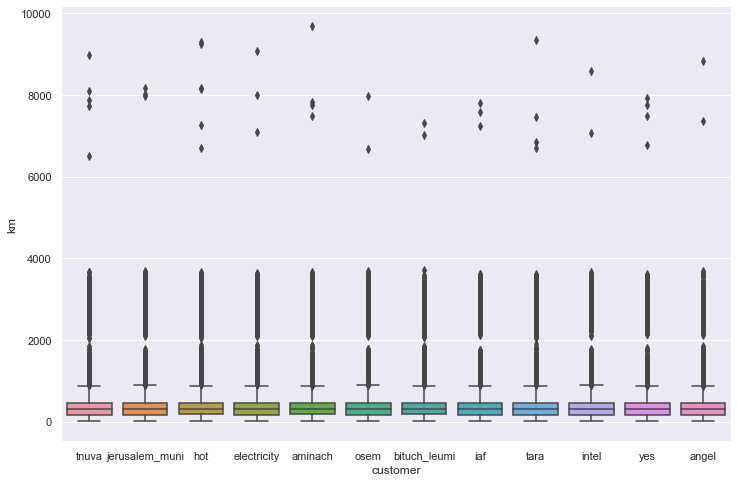

In [206]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='customer', y='km', data=merger.all_trips)

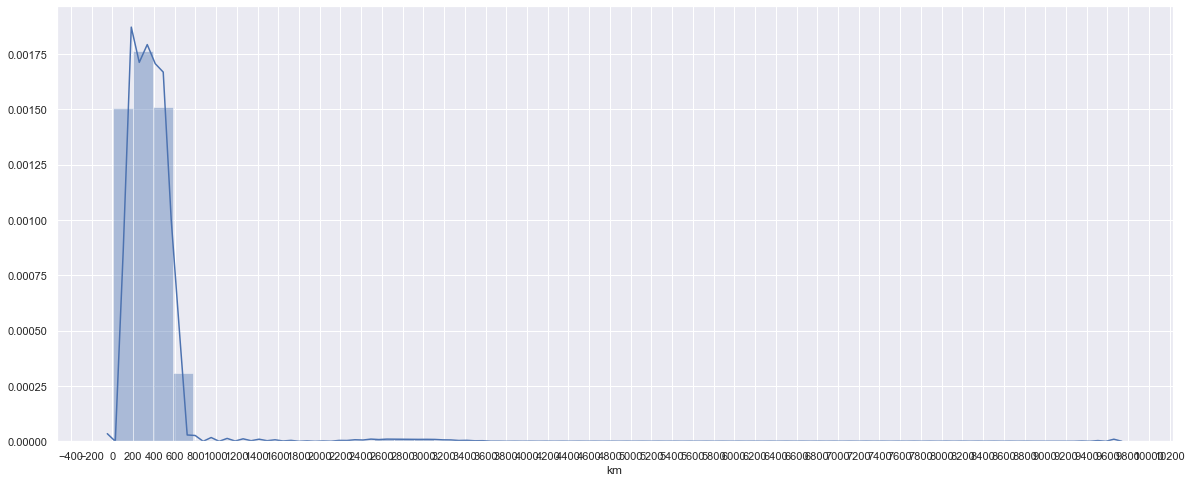

In [207]:
fig = plt.figure(figsize=(20,8))
ax = sns.distplot(merger.all_trips['km'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

There are some trip of more than 1000km!  
So we'll take a threshold of 750km, and for all the trips above the threshold get the value of 750.

In [208]:
all_trips = merger.all_trips

In [209]:
all_trips.loc[all_trips['km'] > 750, 'km'] = 750

### 3.2 Handle false time reports 

Now, we shall search for outliers:

According to the customer, driver can't drive more than 12 hours a day.  
In addition, track's speed is between 40-100 km\h.  
With this information, we can detect false kms or times reports.  
For each trip, I'll bound the time to 12 hours and calculate the maximal and minimal km in the range above,  
and search for unreasonable trip lengths.

#### 3.2.1 Handle too long durations 

First, we shall calculate the duration column:

In [210]:
all_trips['duration'] = all_trips['end_time'] - all_trips['start_time']

Let's see if there are some too long trips:

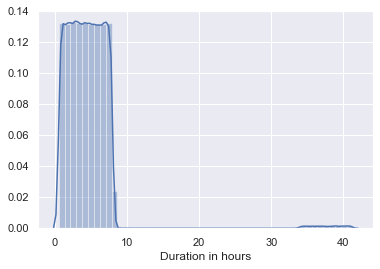

In [211]:
sns.distplot(all_trips['duration'].dt.total_seconds().dropna() / 3600, axlabel='Duration in hours')

In [212]:
all_trips['duration'] = all_trips['duration']\
                        .apply(lambda x: np.min((x , pd.to_timedelta('12 hours'))) \
                               if not pd.isnull(x) else pd.to_timedelta(np.nan))

And update the end_time:

In [213]:
all_trips['end_time'] = all_trips['start_time'] + all_trips['duration']

#### 3.2.2 Handle too fast/slow trips  

Now we need to calc the avg. speed for each trip:

In [214]:
all_trips['trip_average_speed_km_h'] = (all_trips['km'] * 1000 / all_trips['duration'].dt.total_seconds()) * 3.6

Azrieli doesn't want any of his driver get offended.  
So I'll fix the duration (and the end_time accordingly) so the average speed will be reasonable:

In [215]:
too_fast_idx = all_trips['trip_average_speed_km_h'] > 100
too_slow_idx = all_trips['trip_average_speed_km_h'] < 40

In [216]:
def calc_reasonable_short_duration(km):
    meters = km * 1000
    reasonable_speed_m_per_s = 100 / 3.6
    return meters / reasonable_speed_m_per_s

In [217]:
def calc_reasonable_long_duration(km):
    meters = km * 1000
    reasonable_speed_m_per_s = 40 / 3.6
    return meters / reasonable_speed_m_per_s

In [218]:
all_trips.loc[too_fast_idx, 'end_time'] = all_trips.loc[too_fast_idx, 'start_time'] +\
                                            pd.to_timedelta(all_trips.loc[too_fast_idx, 'km']\
                                                            .apply(calc_reasonable_short_duration), \
                                                            unit='s')
all_trips.loc[too_fast_idx, 'trip_average_speed_km_h'] = 100

In [219]:
all_trips.loc[too_slow_idx, 'end_time'] = all_trips.loc[too_slow_idx, 'start_time'] +\
                                            pd.to_timedelta(all_trips.loc[too_slow_idx, 'km']\
                                                            .apply(calc_reasonable_long_duration), \
                                                            unit='s')
all_trips.loc[too_slow_idx, 'trip_average_speed_km_h'] = 40

And now re-calculate the duration:

In [220]:
all_trips['duration'] = all_trips['end_time'] - all_trips['start_time']

### 3.3 Handle missing start\end times 

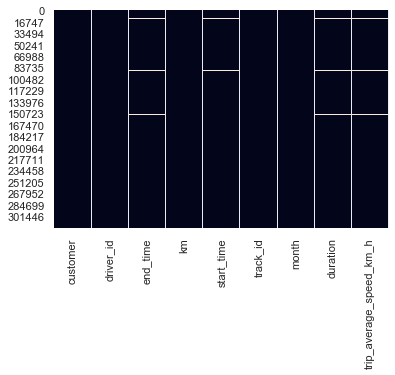

In [221]:
sns.heatmap(merger.all_trips.isnull(), cbar=False)

For this cases which lack of both start and end time, I'll set the start time to be the first sunday of the month at 6am (to avoid bonuses), and then handle them like the only end_time is missing 

In order to fill the NaNs in the above data frame, I'll calculate the average speed of each driver,  
and then add/substract the avg_speed from the start/end time. 

In [222]:
full_trips = all_trips[['driver_id', 'start_time', 'end_time', 'km']].dropna(axis=0)
full_trips['start_time'] = pd.to_timedelta(full_trips['start_time'])
full_trips['end_time'] = pd.to_timedelta(full_trips['end_time'])
full_trips['duration'] = full_trips['end_time'] - full_trips['start_time']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
full_trips['speed'] = full_trips['duration'] / full_trips['km'] 

In [224]:
full_trips.head()

,driver_id,start_time,end_time,km,duration,speed
0,949,16587 days 01:05:00,16587 days 04:16:00,252.820806,03:11:00,00:00:45.328547
2,641,16588 days 03:25:00,16588 days 04:18:00,62.763052,00:53:00,00:00:50.666752
3,268,16588 days 12:38:00,16588 days 15:42:00,267.968900,03:04:00,00:00:41.198810
4,897,16589 days 02:57:00,16589 days 07:40:00,379.727611,04:43:00,00:00:44.716263
5,466,16589 days 14:27:00,16589 days 17:47:00,234.929297,03:20:00,00:00:51.079197


In [225]:
def timedelta_avg(vals):
    return pd.to_timedelta(np.mean(np.asarray([val.value for val in vals])))
full_trips['driver_avg_speed'] = full_trips.groupby('driver_id')['speed'].transform(timedelta_avg)

Now let's add the driver_avg_speed to the drivers' data frame

In [226]:
drivers_avg_speed = full_trips.rename(columns={'driver_id': 'id'})[['id', 'driver_avg_speed']].drop_duplicates()
drivers['drivers'] = pd.merge(drivers['drivers'], drivers_avg_speed)

Now, we need to calculate the missing start/end time

For the cases which lack of both start and end time, I'll set the start time to be the first sunday of the month at 6am (to avoid bonuses), and then handle them like the only end_time is missing 

In [227]:
def get_first_work_day(month):
    offset = pd.offsets.BMonthBegin()
    return offset.rollback(month) + pd.to_timedelta('6 hours')

In [228]:
no_time_at_all_idx = all_trips['end_time'].isnull() & all_trips['start_time'].isnull()
all_trips.loc[no_time_at_all_idx, 'start_time'] = all_trips['month'].apply(get_first_work_day)

In [229]:
no_end_times = all_trips[all_trips['end_time'].isnull()].fillna(np.nan)
no_start_times = all_trips[all_trips['start_time'].isnull()].fillna(np.nan)

Adding the driver_average_speed column:

In [230]:
no_end_times = no_end_times.reset_index().merge(drivers_avg_speed.rename(columns={'id':'driver_id'})).set_index('index')
no_start_times = no_start_times.reset_index().merge(drivers_avg_speed.rename(columns={'id':'driver_id'})).set_index('index')

And calc the missed time by the velocity and the distance:

In [231]:
no_end_times['end_time'] = pd.to_timedelta(no_end_times['driver_avg_speed'].dt.total_seconds() *\
                                           no_end_times['km'], unit='s') + no_end_times['start_time'] 
no_start_times['start_time'] = no_start_times['end_time'] -\
                        pd.to_timedelta(no_start_times['driver_avg_speed'].dt.total_seconds() * no_start_times['km'], unit='s') 

In [232]:
all_trips.loc[no_end_times.index, 'end_time'] = no_end_times['end_time']
all_trips.loc[no_start_times.index, 'start_time'] = no_start_times['start_time']

Now we can re-calc the durations and the average speed:

In [233]:
all_trips['duration'] = all_trips['end_time'] - all_trips['start_time']
all_trips['trip_average_speed_km_h'] = (all_trips['km'] * 1000 / all_trips['duration'].dt.total_seconds()) * 3.6

In [234]:
all_trips.describe()

,driver_id,km,duration,trip_average_speed_km_h
count,318181.000000,318181.000000,318181,318181.000000
mean,500.579384,322.656840,0 days 04:18:34.959124,74.755963
std,288.637042,176.152260,0 days 02:18:26.308143,9.507012
min,1.000000,3.493996,0 days 00:05:14.459677,40.000000
25%,251.000000,173.615246,0 days 02:21:00,67.303201
50%,501.000000,315.218656,0 days 04:15:00,74.553830
75%,751.000000,458.813839,0 days 06:11:00,82.433731
max,1000.000000,750.000000,0 days 12:00:00,100.000000


## 4. Summarize the data

Now we need to summarize the data: sum the km per driver per month,  
calc the income for each trip and sum it all.

### 4.1 Calculate the incomes 

We should split the trips by the times.  
The bonuses are added by the following rules:
- The night bonus added between 22\:00-06\:00.
- The weekend bonus added between Friday, 16:00 until Saturday, 20:00
- The extra milage bonus added for each km after the 200th.
- There are double bonuses

### 4.1.1 Calc the amount of KMs for each bonus 

I'd like to add columns to the trips table for every kind of rates.

In [254]:
def calc_night_bonuses(row):
    if row['start_time'].hour > 22 or row['start_time'].hour < 6:
        return (min(row['duration'], pd.to_timedelta('8h')) / row['duration']) * row.km
    return 0

In [277]:
def calc_weekend_bonuses(row):
    if (row['start_time'].day == 4 and row['start_time'].hour > 16) or\
        (row['start_time'].day == 5 and row['start_time'].hour < 20):
        offset = pd.offsets.DateOffset(weekday=5, hour=20)
        return (min(row['duration'], pd.to_timedelta('8h')) / row['duration']) * row.km
    return 0

In [284]:
def calc_extra_milage_bonuses(row):
    return max(0, row['km'] - 200)

In [285]:
all_trips['night_bonuses'] = all_trips.apply(calc_night_bonuses, axis=1)
all_trips['weekend_bonuses'] = all_trips.apply(calc_weekend_bonuses, axis=1)
all_trips['extra_milage_bonuses'] = all_trips.apply(calc_extra_milage_bonuses, axis=1)

### 4.1.2 Group rates by company 

Let's check that all the companies isted in the all_trip table, listed in the taarif tabel either:

In [305]:
set(taarif['customer']).difference(set(all_trips['customer']))

{'dbs', 'mizranei_kfar_saba', 'telecommunication_ltd'}

In [306]:
set(all_trips['customer']).difference(set(taarif['customer']))

{'aminach', 'hot', 'yes'}

According to Azrieli, 'yes' is equivalent to 'dbs', 'aminach' to 'mizranei_kfar_saba' and 'hot' to 'telecommunication_ltd'.

In [310]:
companies_mapper = {'mizranei_kfar_saba': 'aminach', 'telecommunication_ltd': 'hot', 'dbs': 'yes'}
taarif['customer'] = taarif['customer'].replace(companies_mapper)

In [316]:
all_trips_taarif.head()

,customer,driver_id,end_time,km,start_time,track_id,month,duration,trip_average_speed_km_h,night_bonuses,weekend_bonuses,extra_milage_bonuses,basic_taarif,extra_milage,night_bonus,weekend_bonus
0,tnuva,949,2015-06-01 04:16:00.000000000,252.820806,2015-06-01 01:05:00,4781353,2015-06-01,03:11:00,79.420149,252.820806,0.0,52.820806,6.0,3.0,80.0,0.0
1,jerusalem_muni,148,2015-06-01 06:55:52.686117995,68.320862,2015-06-01 06:00:00,4781353,2015-06-01,00:55:52.686117,73.360611,0.000000,0.0,0.000000,8.0,40.0,50.0,30.0
2,hot,641,2015-06-02 04:18:00.000000000,62.763052,2015-06-02 03:25:00,4781353,2015-06-01,00:53:00,71.052512,62.763052,0.0,0.000000,7.0,7.0,10.0,40.0
3,electricity,268,2015-06-02 15:42:00.000000000,267.968900,2015-06-02 12:38:00,4781353,2015-06-01,03:04:00,87.381163,0.000000,0.0,67.968900,10.0,5.0,40.0,70.0
4,aminach,897,2015-06-03 07:40:00.000000000,379.727611,2015-06-03 02:57:00,4781353,2015-06-01,04:43:00,80.507621,379.727611,0.0,179.727611,15.0,4.0,0.0,25.0


In [317]:
all_trips_taarif = all_trips.merge(taarif, how='left')
all_trips_taarif['Income'] = all_trips_taarif['basic_taarif'] *\
                            (all_trips_taarif['km'] \
                           + all_trips_taarif['night_bonuses'] * (all_trips_taarif['night_bonus'] / 100) \
                           + all_trips_taarif['weekend_bonuses'] * (all_trips_taarif['weekend_bonus'] / 100) \
                           + all_trips_taarif['extra_milage_bonuses'] * (all_trips_taarif['extra_milage'] / 100))

In [329]:
all_trips['total_income'] = all_trips_taarif['Income']

### 4.2 Summarize the income per driver 

In [350]:
summary = all_trips.groupby(['month', 'driver_id'])[['total_income', 'km']].sum().reset_index()

In [351]:
summary = summary.merge(drivers['drivers'][['id', 'gender', 'age', 'vetek_years']]\
                        .rename(columns={'id': 'driver_id'}), how='left')\
                 .rename(columns=lambda x: x.capitalize()).round(1)\
                 .rename(columns={'Km': 'Total_km', 'Vetek_years': 'Vetek'})

In [353]:
summary.head()

,Month,Driver_id,Total_income,Total_km,Gender,Age,Vetek
0,2015-01-01,1,101120.7,8839.3,F,39.0,1.4
1,2015-01-01,2,140929.0,9616.1,M,60.0,1.0
2,2015-01-01,3,96516.4,8023.2,M,44.0,4.7
3,2015-01-01,4,94328.5,7378.3,M,54.0,11.7
4,2015-01-01,5,133661.8,9594.8,M,35.0,4.7
